In [ ]:
import pandas as pd
from matplotlib import pyplot as plt        

In [ ]:
cities = pd.read_csv('au.csv')

In [ ]:
cities.head()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from itertools import combinations
import numpy as np
from matplotlib.collections import LineCollection
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

In [5]:
def curved_line(lon1, lat1, lon2, lat2, exaggeration=0.3, steps=100):
    # Midpoint and offset
    mid_lon = (lon1 + lon2) / 2
    mid_lat = (lat1 + lat2) / 2 + exaggeration  # exaggerate curve in latitude
    lons = np.linspace(lon1, lon2, steps)
    lats = np.linspace(lat1, lat2, steps)
    curve = [(lon, lat + exaggeration * np.sin(np.pi * i / (steps - 1)))
             for i, (lon, lat) in enumerate(zip(lons, lats))]
    return zip(*curve)

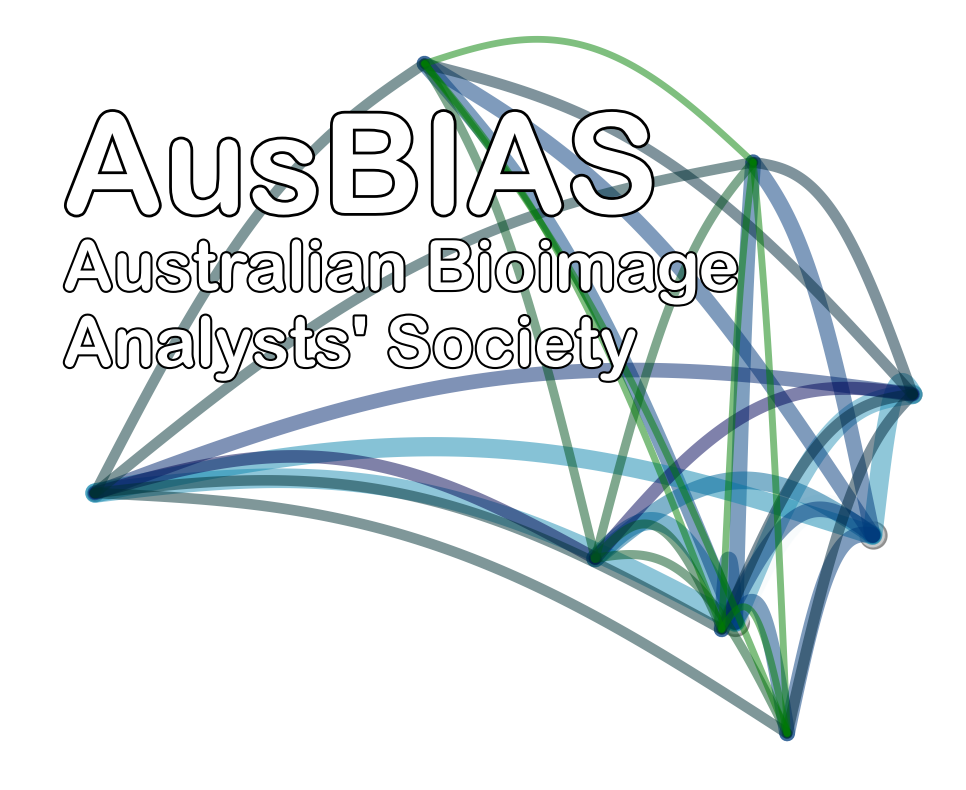

In [17]:

# === Config ===
CSV_PATH = "au.csv"
TOP_X = 10  # Adjust this as needed

# === Load Data ===
df = pd.read_csv(CSV_PATH)

# Sort by population and take top X
#top_cities = df.sort_values(by="population", ascending=False).head(TOP_X)
#coords = list(zip(top_cities['lng'], top_cities['lat']))

city_list = ["Sydney", "Melbourne", "Brisbane", "Adelaide", "Perth","Cairns", "Darwin","Geelong", "Hobart"]  # Replace with your cities
df['city_lower'] = df['city'].str.lower()
top_cities = df[df['city_lower'].isin([c.lower() for c in city_list])]
coords = list(zip(top_cities['lng'], top_cities['lat']))
populations = top_cities['population'].values
max_pop = populations.max()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Black ocean and land
#ax.background_patch.set_facecolor('black')
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='black', alpha=0.0)
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='white')

# White coastlines and borders
#ax.add_feature(cfeature.BORDERS.with_scale('50m'), edgecolor='white', linestyle=':', alpha=0.1)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black', alpha=0.0)

# Plot points
for (lon, lat), pop in zip(coords, populations):
    size = 5 + 15 * (pop / max_pop)  # scale sizes between 5 and 20
    ax.plot(lon, lat, 'o', markersize=size, color='gray', alpha=0.8, transform=ccrs.PlateCarree())

# Draw lines between every pair
#for (lon1, lat1), (lon2, lat2) in combinations(coords, 2):
#    ax.plot([lon1, lon2], [lat1, lat2], color='gray', linewidth=0.5, alpha=0.6, transform=ccrs.Geodetic())

num_lines = len(list(combinations(coords, 2)))
colors = plt.cm.rainbow(np.linspace(0, 1, num_lines))
np.random.shuffle(colors)

city_names = list(top_cities['city_lower'])
pop_values = top_cities['population'].values
pop_max = (top_cities['population'] * 2).max() 

cmap = plt.get_cmap('ocean')  # You can change to 'viridis', 'turbo', etc.
pop_max = (top_cities['population'] * 2).max()  # max combined population
pop_min = (top_cities['population'] * 2).min()
norm = mcolors.Normalize(vmin=pop_min, vmax=pop_max)

pop_dict = dict(zip(top_cities['city_lower'], top_cities['population']))
city_coords = dict(zip(top_cities['city_lower'], zip(top_cities['lng'], top_cities['lat'])))

segments = []
colors = []
widths = []

for name1, name2 in combinations(city_names, 2):
    lon1, lat1 = city_coords[name1]
    lon2, lat2 = city_coords[name2]
    pop1 = pop_dict[name1]
    pop2 = pop_dict[name2]
    combined_pop = pop1 + pop2

    # Get exaggerated curve
    lons, lats = curved_line(lon1, lat1, lon2, lat2, exaggeration=3.0)
    segment = list(zip(lons, lats))

    segments.append(segment)
    colors.append(cmap(norm(combined_pop)))
    widths.append(4.5 + 13.5 * (combined_pop / pop_max))

# Create LineCollection with rounded caps
lc = LineCollection(
    segments,
    colors=colors,
    linewidths=widths,
    capstyle='round',  # <<< Rounded ends
    transform=ccrs.PlateCarree(),
    alpha=0.5

)

ax.add_collection(lc)

# Set extent (optional — global view)
#ax.set_global()
ax.set_extent([112, 155, -45, -10], crs=ccrs.PlateCarree())
plt.tight_layout()
ax.set_frame_on(False)

text_effects = [path_effects.Stroke(linewidth=4, foreground='black'),
                path_effects.Normal()]

sub_text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]

font_path = "ARLRDBD.TTF"  
prop = fm.FontProperties(fname=font_path)
mvdown = .065

main_text = fig.text(
    0.15, 0.92 - mvdown, "AusBIAS", 
    fontsize=100, fontweight='normal', color='white', ha='left', va='top', fontproperties=prop

)
main_text.set_path_effects(text_effects)

sub_text = fig.text(
    0.15, 0.76 - mvdown, "Australian Bioimage\nAnalysts' Society", 
    fontsize=50, fontweight='bold', color='white', ha='left', va='top', fontproperties=prop
)

sub_text.set_path_effects(sub_text_effects)
plt.savefig("../assets/images/newlogo.png",bbox_inches='tight', dpi=300)
plt.show()


In [91]:
import matplotlib.font_manager as fm
print(sorted([f.name for f in fm.fontManager.ttflist]))

['C059', 'C059', 'C059', 'C059', 'Cantarell', 'Cantarell', 'Cantarell', 'Cantarell', 'Cantarell', 'D050000L', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'Droid Arabic Kufi', 'Droid Arabic Kufi', 'Droid Sans', 'Droid Sans', 'Droid Sans Armenian', 'Droid Sans Devanagari', 'Droid Sans Ethiopic', 'Droid Sans Ethiopic', 'Droid Sans Fallback', 'Droid Sans Georgian', 'Droid Sans Hebrew', 'Droid Sans Hebrew', 'Droid Sans Japanese', 'Droid Sans Tamil', 'Droid Sans Tamil', 'Droid Sans Thai', 'FontAwesome', 'FontAwesome', 'FreeMono', 'FreeMono', 'FreeMono', 'FreeMono', 'FreeSans', 